# Project 9 -- Lukas Anell

/anvil/projects/tdm/data/death_records/DeathRecords.csv

## Question 1

In [1]:
myDF <- read.csv("/anvil/projects/tdm/data/death_records/DeathRecords.csv")

In [4]:
head(myDF)

,Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,0,2,1,1,M,1,87,0,...,24,1,1,1,0,0,1,1,100,6
2,2,1,0,2,1,1,M,1,58,0,...,21,3,3,1,0,0,1,1,100,6
3,3,1,0,7,1,1,F,1,75,0,...,28,2,2,1,0,0,1,1,100,6
4,4,1,0,6,1,1,M,1,74,0,...,22,3,3,1,0,0,1,1,100,6
5,5,1,0,3,1,1,M,1,64,0,...,21,1,1,1,0,0,1,1,100,6
6,6,1,0,5,1,1,F,1,93,0,...,37,5,5,1,0,0,1,1,100,6


In [5]:
raceDF <- read.csv("/anvil/projects/tdm/data/death_records/Race.csv")
maritalDF <- read.csv("/anvil/projects/tdm/data/death_records/MaritalStatus.csv")
dayOfWeekDF <- read.csv("/anvil/projects/tdm/data/death_records/DayOfWeekOfDeath.csv")

In [6]:
head(raceDF)
head(maritalDF)
head(dayOfWeekDF)

,Code,Description
,<int>,<chr>
1,0,Other races
2,1,White
3,2,Black
4,3,American Indian (includes Aleuts and Eskimos)
5,4,Chinese
6,5,Japanese


,Code,Description
,<chr>,<chr>
1,S,"Never married, single"
2,M,Married
3,W,Widowed
4,D,Divorced
5,U,Marital Status unknown


,Code,Description
,<int>,<chr>
1,1,Sunday
2,2,Monday
3,3,Tuesday
4,4,Wednesday
5,5,Thursday
6,6,Friday


In [7]:
raceCounts <- sort(table(myDF$Race), decreasing = TRUE)
raceCounts


      1       2       3       4       7      68       5      18      48      28 
2241510  309504   18031   13297   11074    8737    8159    6778    4913    4711 
     78       6      38      58 
   2818     700     623     316 

In [8]:
myDF$raceLabelFactors <- factor(
    myDF$Race,
    levels = raceDF[[1]],
    labels = raceDF[[2]]
)

raceLabelCounts <- sort(table(myDF$raceLabelFactors), decreasing = TRUE)
raceLabelCounts


                                                                                                      White 
                                                                                                    2241510 
                                                                                                      Black 
                                                                                                     309504 
                                                              American Indian (includes Aleuts and Eskimos) 
                                                                                                      18031 
                                                                                                    Chinese 
                                                                                                      13297 
                                                                                                   Filipino 
                  

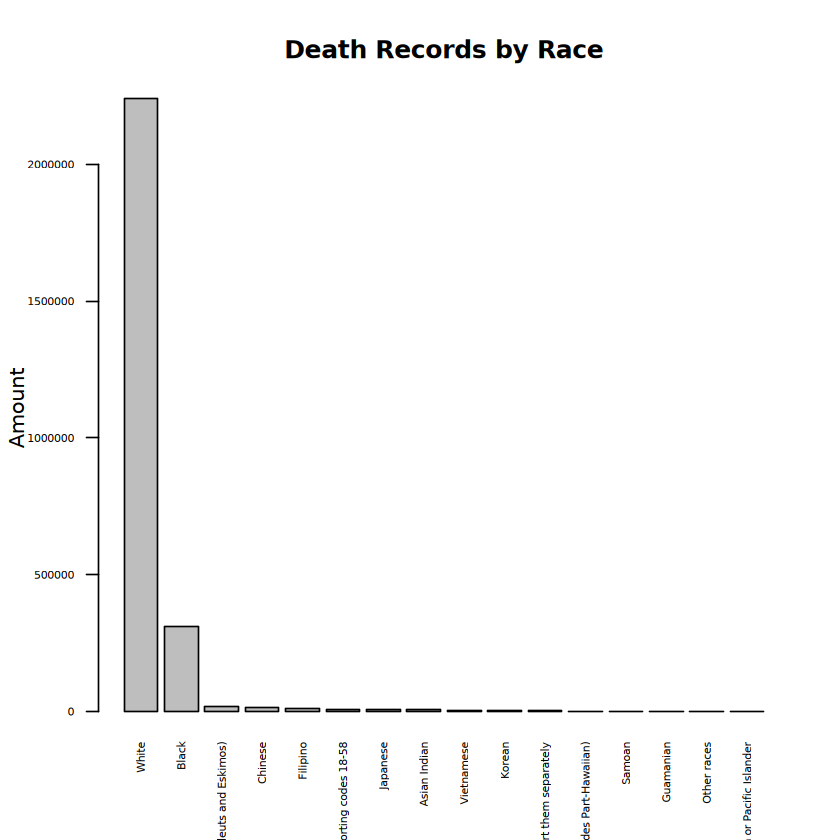

In [9]:
barplot(
    raceLabelCounts,
    main = "Death Records by Race",
    ylab = "Amount",
    las = 2,
    cex.names = 0.5,
    cex.axis = 0.5
)

I have a bit of trouble when figuring out how to use `raceDF` to decode the race column in `myDF`, but looking back at project 8 when we used `factor()` helped me figure out how to use it to pair the data together.
I found it annoying to try to fit the labels, especially the barplot labels, onto the graph image but I think I mostly got it, except for the super long ones.
I was a bit surprised with the sheer difference between the population of white people and everybody else. I knew there was a large difference, but I didn't think it was so big.

1.1: I learned that the Race column pairs indices with Races that can be used to decode the Race column in `myDF`.

1.2: I think the marriage status one would be interesting to look at, but I also think the day of the week one would be very interesting. I'm not sure about when the higher death records would be, but I think there would probably be some sort of trend.

1.3:  `Other Asian or Pacific Islander` had the smallest number of entries. Of the ones that had entries at all, it was `Guamanian`

## Question 2

In [10]:
save_df <- myDF[myDF$Race != 1,  ]

In [11]:
save_df$raceLabelFactors <- factor(
    save_df$Race,
    levels = raceDF[[1]],
    labels = raceDF[[2]]
)

In [12]:
sorted_save_df <- sort(table(save_df$raceLabelFactors), decreasing = TRUE)
head(sorted_save_df)


                                                         Black 
                                                        309504 
                 American Indian (includes Aleuts and Eskimos) 
                                                         18031 
                                                       Chinese 
                                                         13297 
                                                      Filipino 
                                                         11074 
Other Asian or Pacific Islander in areas reporting codes 18-58 
                                                          8737 
                                                      Japanese 
                                                          8159 

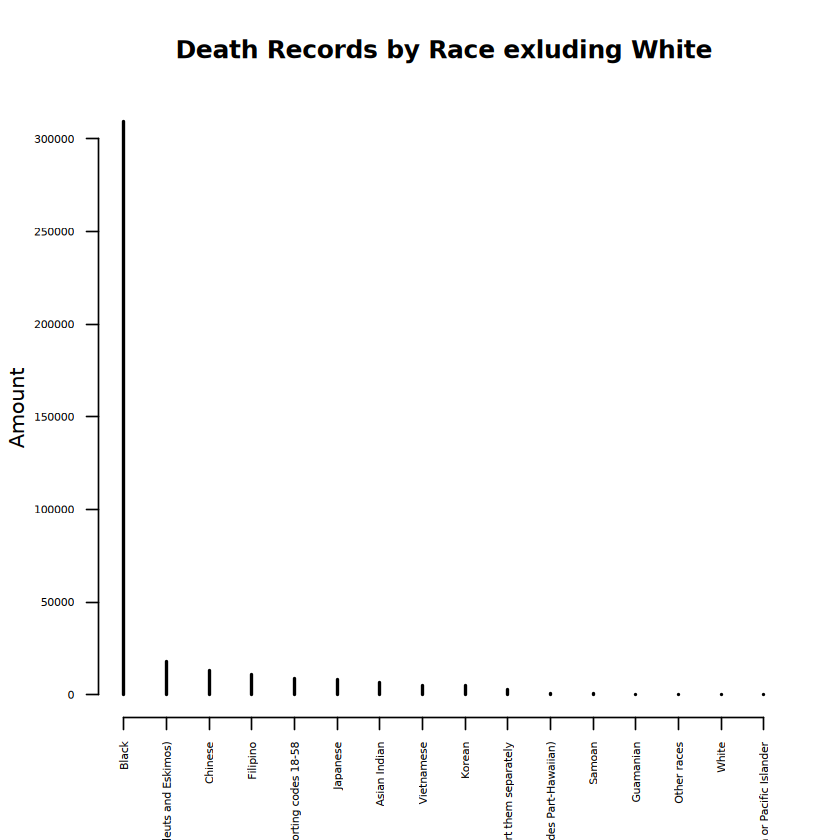

In [13]:
plot(
    sorted_save_df,
    main = "Death Records by Race exluding White",
    ylab = "Amount",
    las = 2,
    cex.axis = 0.5
)


                 American Indian (includes Aleuts and Eskimos) 
                                                         18031 
                                                       Chinese 
                                                         13297 
                                                      Filipino 
                                                         11074 
Other Asian or Pacific Islander in areas reporting codes 18-58 
                                                          8737 
                                                      Japanese 
                                                          8159 
                                                  Asian Indian 
                                                          6778 

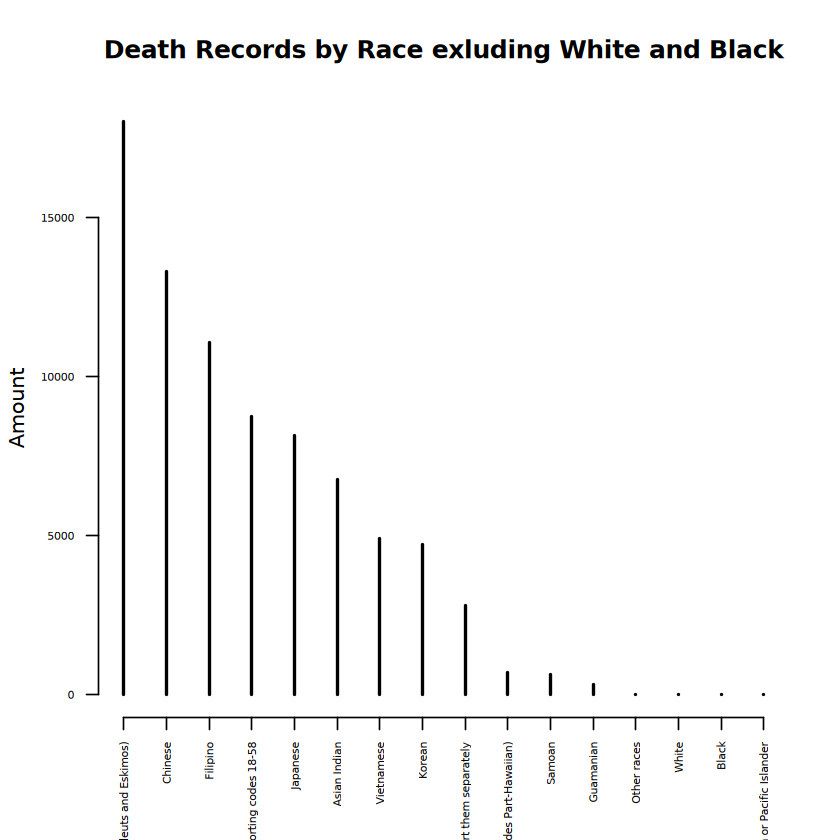

In [14]:
save_df_2 <- myDF[myDF$Race != 1 & myDF$Race != 2, ]

save_df_2$raceLabelFactors <- factor(
    save_df_2$Race,
    levels = raceDF[[1]],
    labels = raceDF[[2]]
)
sorted_save_df_2 <- sort(table(save_df_2$raceLabelFactors), decreasing = TRUE)
head(sorted_save_df_2)

plot(
    sorted_save_df_2,
    main = "Death Records by Race exluding White and Black",
    ylab = "Amount",
    las = 2,
    cex.axis = 0.5
)


                                                       Chinese 
                                                         13297 
                                                      Filipino 
                                                         11074 
Other Asian or Pacific Islander in areas reporting codes 18-58 
                                                          8737 
                                                      Japanese 
                                                          8159 
                                                  Asian Indian 
                                                          6778 
                                                    Vietnamese 
                                                          4913 

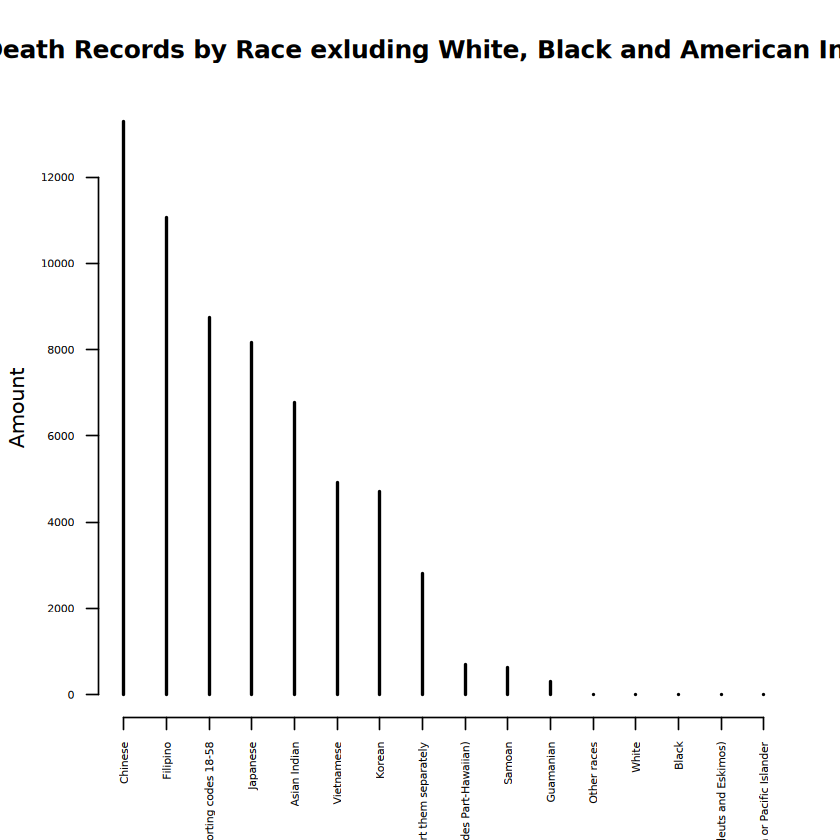

In [15]:
save_df_3 <- myDF[myDF$Race != 1 & myDF$Race != 2 & myDF$Race != 3, ]

save_df_3$raceLabelFactors <- factor(
    save_df_3$Race,
    levels = raceDF[[1]],
    labels = raceDF[[2]]
)
sorted_save_df_3 <- sort(table(save_df_3$raceLabelFactors), decreasing = TRUE)
head(sorted_save_df_3)

plot(
    sorted_save_df_3,
    main = "Death Records by Race exluding White, Black and American Indian",
    ylab = "Amount",
    las = 2,
    cex.axis = 0.5
)

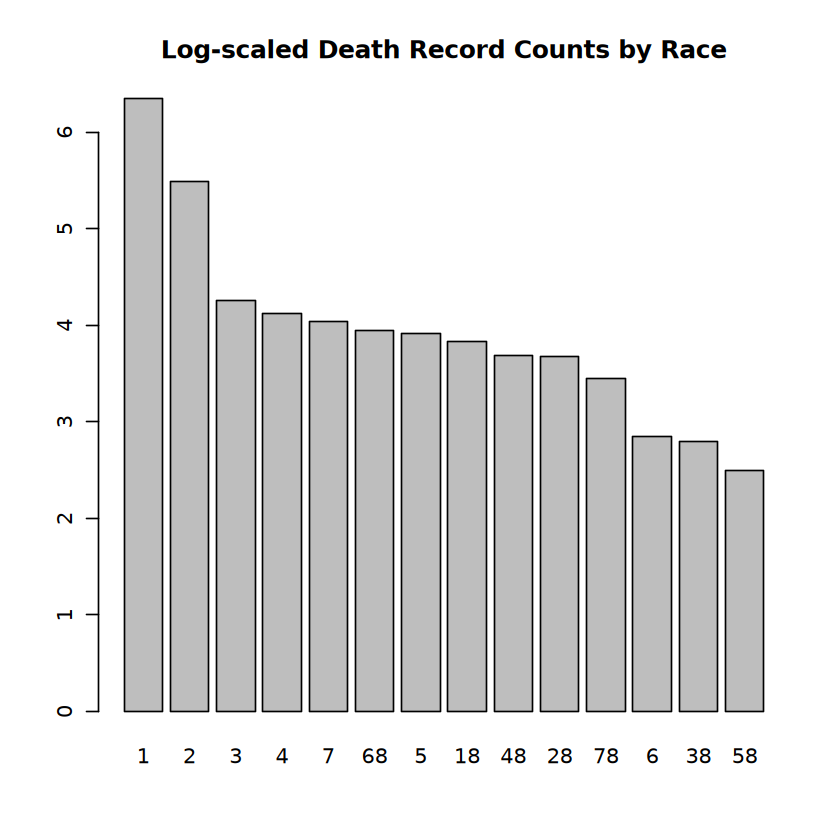

In [16]:
race_counts <- table(myDF$Race)
barplot(log10(sort(race_counts, decreasing = TRUE)), main = "Log-scaled Death Record Counts by Race")

I found it a lot more difficult to use `dotchart()`, I couldn't really figure out how to use the labels with it without it clipping out, but I also prefer the normal `plot()` function's look.
I think you could exclude the `2` race value and it would definitely lessen the margin between the other ones. However, I think this would lose a lot of data, seeing as now two of the most major races are completely removed from the picture. I think instead it could be better to use a different graph scaling, like a logarithmic scale, which would still have a large gap, but not as large as a linear scale.
I removed the `3` race value and it didn't change the graph much from when I removed the `2` race value, so I think if you were to remove values, it would be best to remove `1` & `2`.
I just saw that it suggests using a logarithmic scale at the very end of the instructions, and I think it looks a lot better than any of the other graphs, even if it does lose a little bit of the idea, especially if you forget it's logarithmic.

2.1: I tried to make the labels for each bar readable by turning them sideways, but I'm pretty sure I've done that in previous projects. I thought the difference between `barplot()` and `plot()` was interesting, as there really isn't very much different.

2.2: I have added labels for every bar in the barplot, as well as labeling the y-axis and the graph itself.

2.3: I excluded White and Black people because they were the biggest outliers in the dataset.

## Question 3

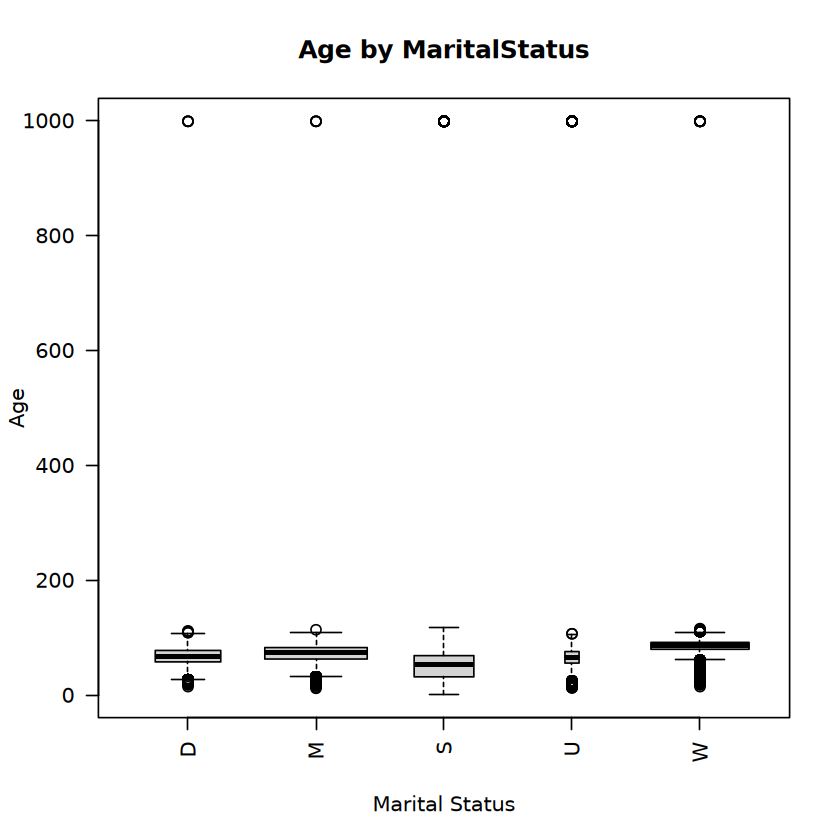

In [17]:
boxplot(
    myDF$Age ~ myDF$MaritalStatus,
    data = myDF,
    main = "Age by MaritalStatus",
    xlab = "Marital Status",
    ylab = "Age",
    las = 2,
    cex.names = 0.7,
    outline = TRUE,
    varwidth = TRUE
)

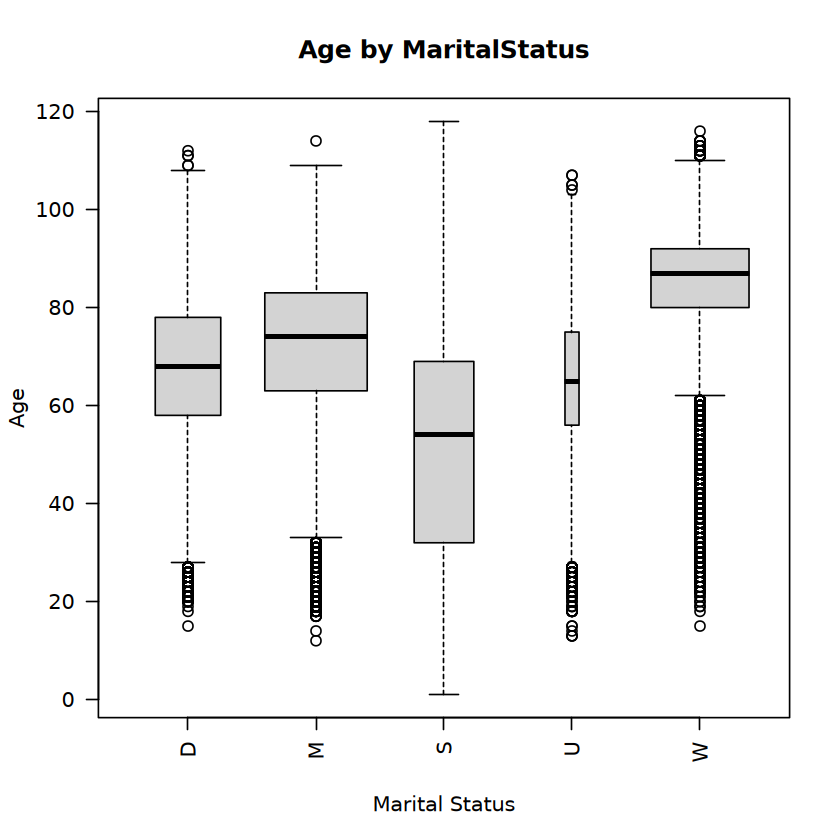

In [18]:
myDF_999Removed <- myDF[ !is.na(myDF$Age) & myDF$Age != 999, ]

boxplot(
    Age ~ MaritalStatus,
    data = myDF_999Removed,
    main = "Age by MaritalStatus",
    xlab = "Marital Status",
    ylab = "Age",
    las = 2,
    cex.names = 0.7,
    outline = TRUE,
    varwidth = TRUE
)

In [19]:
head(maritalDF)

,Code,Description
,<chr>,<chr>
1,S,"Never married, single"
2,M,Married
3,W,Widowed
4,D,Divorced
5,U,Marital Status unknown


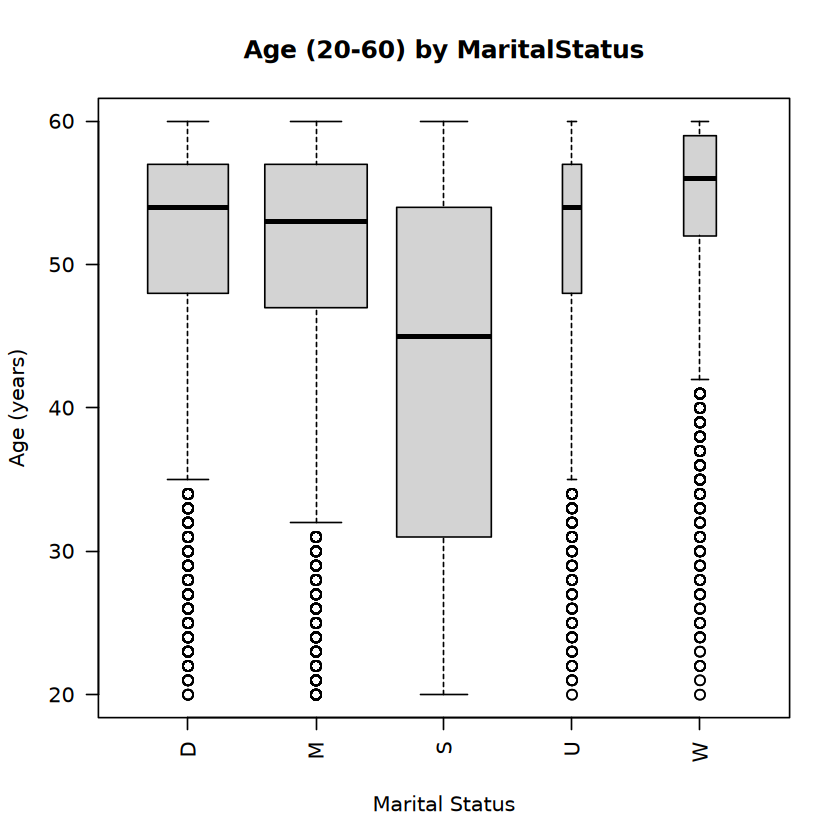

In [20]:
myDF_ageRange <- subset(myDF_999Removed, Age >= 20 & Age <= 60)

boxplot(
    Age ~ MaritalStatus,
    data = myDF_ageRange,
    main = "Age (20-60) by MaritalStatus",
    xlab = "Marital Status",
    ylab = "Age (years)",
    las = 2,
    cex.names = 0.7,
    outline = TRUE,
    varwidth = TRUE
)

I'm curious how a person who's 999 years old got into the dataset haha, it really messed with the data a lot.
I'm a bit confused about how to read the graph, I'm assuming the main box is the real range of the data, while the other lines show outliers to that data?

3.1: The boxplot without 999 removed is a lot more squished because the plot has to fit in the 999 value.

3.2: I think the boxplot shows the marital status of the majority of people in a certain age range. For instance, the majority of people are probably single between ~30 and ~55, but there is some overlap between the statuses where I'd assume there is less data.

## Question 4

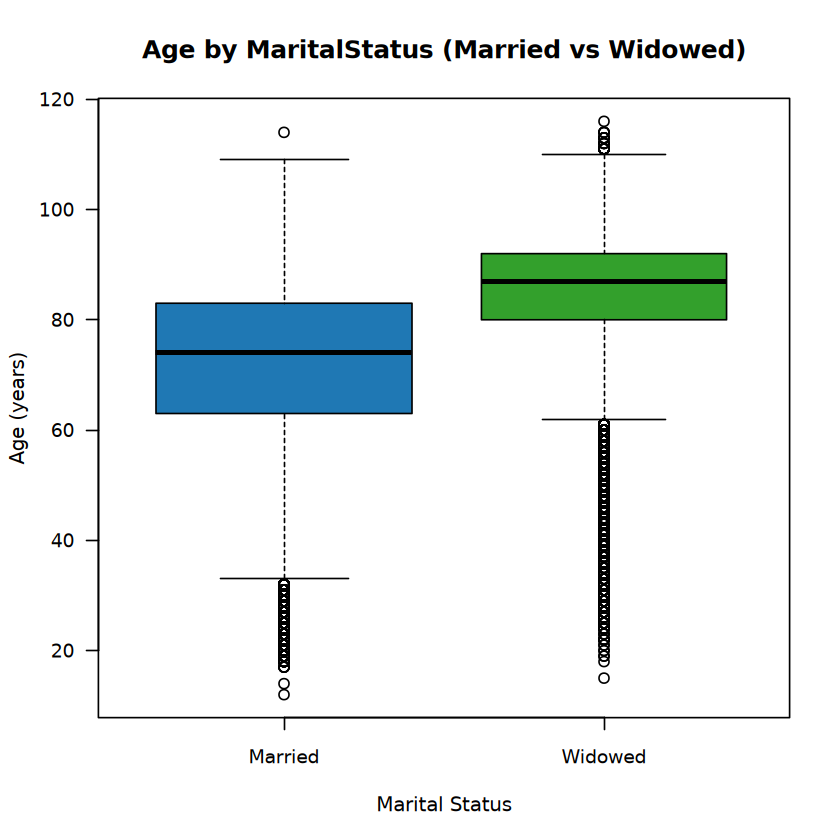

In [21]:
mwDF <- subset(myDF_999Removed, MaritalStatus == "M" | MaritalStatus == "W")
boxplot(
    Age ~ MaritalStatus,
    data = mwDF,
    main = "Age by MaritalStatus (Married vs Widowed)",
    xlab = "Marital Status",
    ylab = "Age (years)",
    las = 1,
    cex.axis = 0.9,
    cex.lab = 0.95,
    outline = TRUE,
    varwidth = TRUE,
    names = c("Married", "Widowed"),
    col = c("#1f78b4", "#33a02c")
)

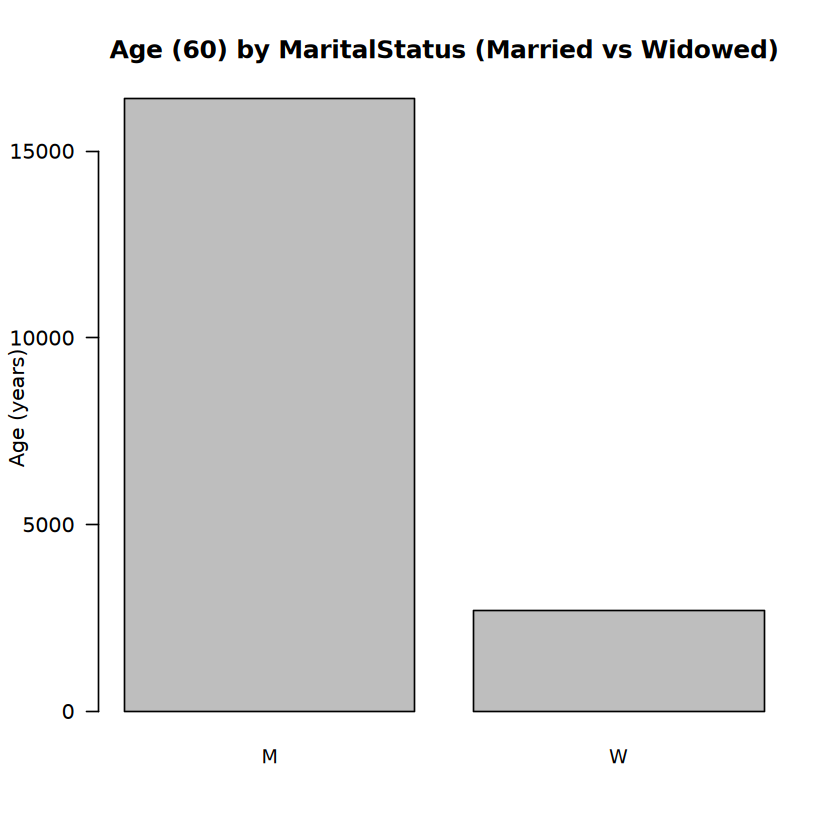

In [22]:
myDF_marriedWidowed60 <- myDF_999Removed[myDF_999Removed$Age == 60 & (myDF_999Removed$MaritalStatus == "W" | myDF_999Removed$MaritalStatus == "M"), ]
count_60 <- table(factor(myDF_marriedWidowed60$MaritalStatus, levels = unique(myDF_marriedWidowed60$MaritalStatus)))
barplot(
    count_60,
    main = "Age (60) by MaritalStatus (Married vs Widowed)",
    ylab = "Age (years)",
    las = 1,
    cex.names = 0.9
)

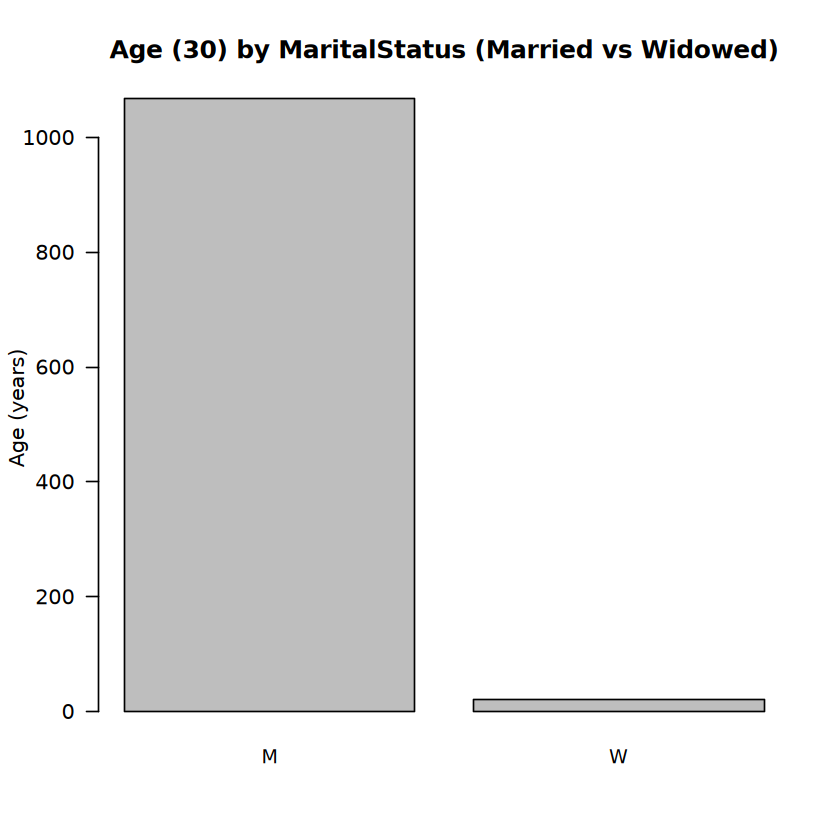

In [23]:
myDF_marriedWidowed30 <- myDF_999Removed[myDF_999Removed$Age == 30 & (myDF_999Removed$MaritalStatus == "W" | myDF_999Removed$MaritalStatus == "M"), ]
count_30 <- table(factor(myDF_marriedWidowed30$MaritalStatus, levels = unique(myDF_marriedWidowed30$MaritalStatus)))
barplot(
    count_30,
    main = "Age (30) by MaritalStatus (Married vs Widowed)",
    ylab = "Age (years)",
    las = 1,
    cex.names = 0.9
)

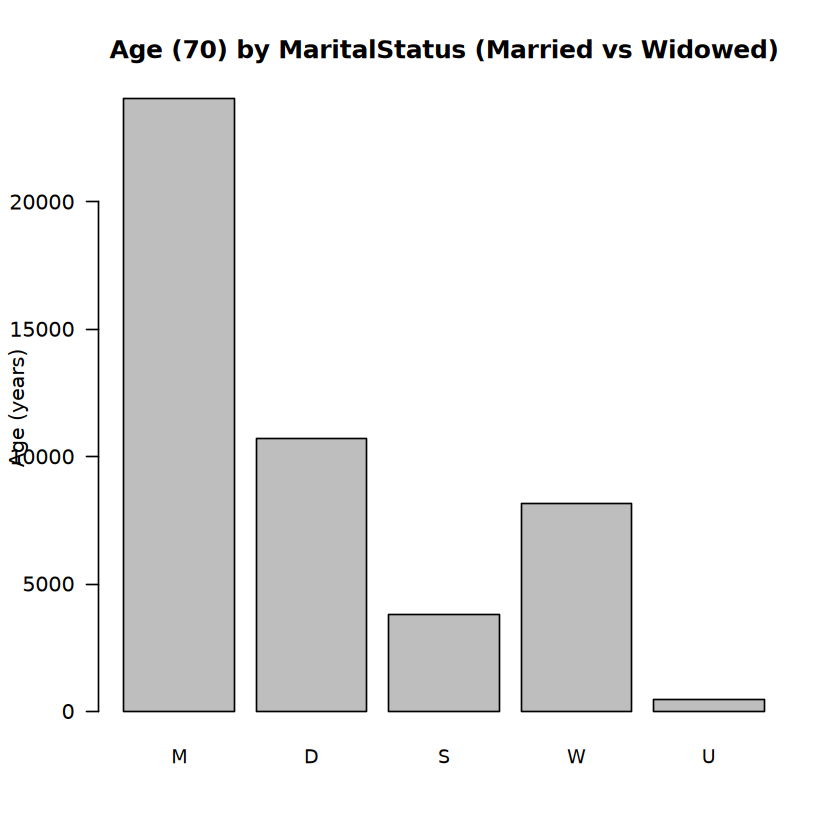

In [24]:
myDF_marriedWidowed70 <- myDF_999Removed[myDF_999Removed$Age == 70, ]
count_70 <- table(factor(myDF_marriedWidowed70$MaritalStatus, levels = unique(myDF_marriedWidowed70$MaritalStatus)))
barplot(
    count_70,
    main = "Age (70) by MaritalStatus (Married vs Widowed)",
    ylab = "Age (years)",
    las = 1,
    cex.names = 0.9
)

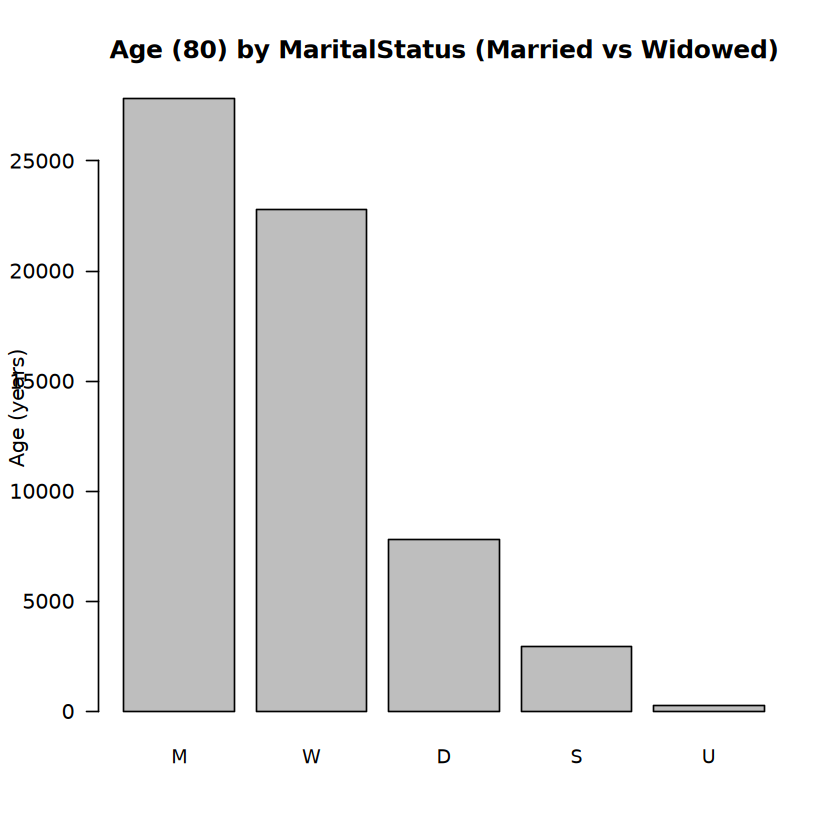

In [25]:
myDF_marriedWidowed80 <- myDF_999Removed[myDF_999Removed$Age == 80, ]
count_80 <- table(factor(myDF_marriedWidowed80$MaritalStatus, levels = unique(myDF_marriedWidowed80$MaritalStatus)))
barplot(
    count_80,
    main = "Age (80) by MaritalStatus (Married vs Widowed)",
    ylab = "Age (years)",
    las = 1,
    cex.names = 0.9
)

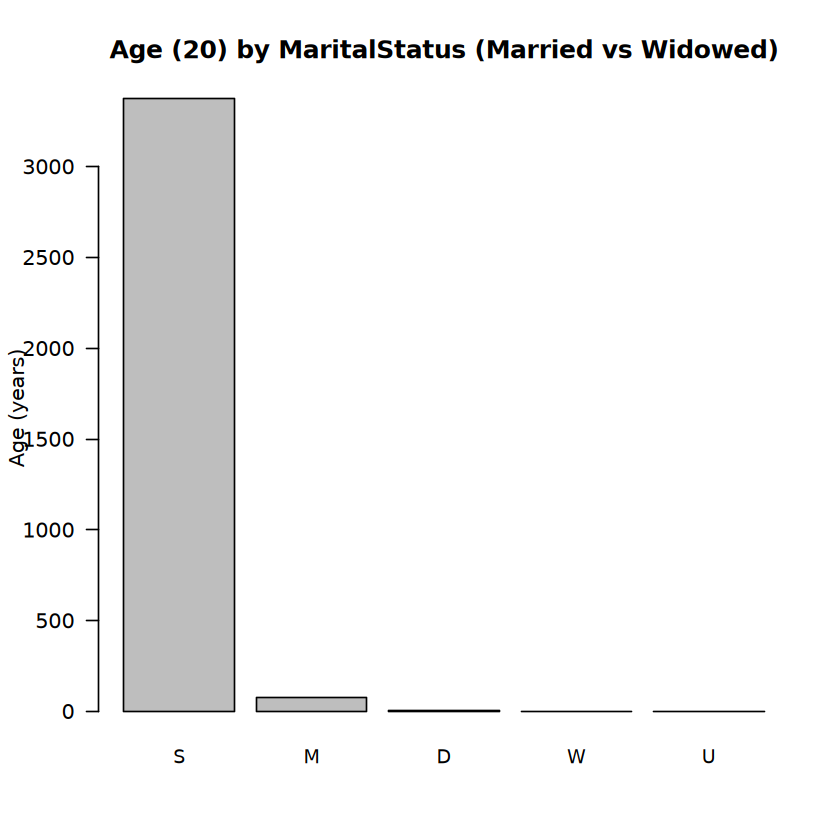

In [26]:
myDF_marriedWidowed20 <- myDF_999Removed[myDF_999Removed$Age == 20, ]
count_20 <- table(factor(myDF_marriedWidowed20$MaritalStatus, levels = unique(myDF_marriedWidowed20$MaritalStatus)))
barplot(
    count_20,
    main = "Age (20) by MaritalStatus (Married vs Widowed)",
    ylab = "Age (years)",
    las = 1,
    cex.names = 0.9
)

I kept getting random errors just from losing track of my variable names and which type of graph I was meant to use, but I got it eventually. Other than that, no comments. Just lots of graphs.

4.1: I think it shows that the majority of Married people are between ~(60-80), while the majority of widowed people are ~(80-90), which checks out.

4.2: I compared age 60 with age 30, and I learned that there's a lot fewer people married at 30 than at 60, which wasn't surprising, but also that there's alot less unmarried 30 year olds than 60 year olds. I think this is just due to population though.

4.3: I think as age increases, marriage rates go up, while single rates go down, while widowed rates go up as you get really, really old.

## Question 5

In [2]:
day_of_week_of_death <- read.csv("/anvil/projects/tdm/data/death_records/DayOfWeekOfDeath.csv")

In [3]:
my_temp <- merge(myDF, day_of_week_of_death, by.x = "DayOfWeekOfDeath", by.y = "Code", all.x = TRUE)

In [4]:
names(day_of_week_of_death)
names(my_temp)

[1] "Code"        "Description"

[1] "DayOfWeekOfDeath"               "Id"                            
 [3] "ResidentStatus"                 "Education1989Revision"         
 [5] "Education2003Revision"          "EducationReportingFlag"        
 [7] "MonthOfDeath"                   "Sex"                           
 [9] "AgeType"                        "Age"                           
[11] "AgeSubstitutionFlag"            "AgeRecode52"                   
[13] "AgeRecode27"                    "AgeRecode12"                   
[15] "InfantAgeRecode22"              "PlaceOfDeathAndDecedentsStatus"
[17] "MaritalStatus"                  "CurrentDataYear"               
[19] "InjuryAtWork"                   "MannerOfDeath"                 
[21] "MethodOfDisposition"            "Autopsy"                       
[23] "ActivityCode"                   "PlaceOfInjury"                 
[25] "Icd10Code"                      "CauseRecode358"                
[27] "CauseRecode113"                 "InfantCauseRecode130"          
[29] "CauseRecode39"                  "NumberOfEntityAxisConditions"  
[31] "NumberOfRecordAxisConditions"   "Race"                          
[33] "BridgedRaceFlag"                "RaceImputationFlag"            
[35] "RaceRecode3"                    "RaceRecode5"                   
[37] "HispanicOrigin"                 "HispanicOriginRaceRecode"      
[39] "Description"

In [30]:
mapping_table <- table(my_temp$DayOfWeekOfDeath, my_temp$Description)
summary(mapping_table)

Number of cases in table: 2631171 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 18418197, df = 49, p-value = 0
	Chi-squared approximation may be incorrect

In [7]:
month_day_table <- table(Month = my_temp$MonthOfDeath, DayName = my_temp$Description)

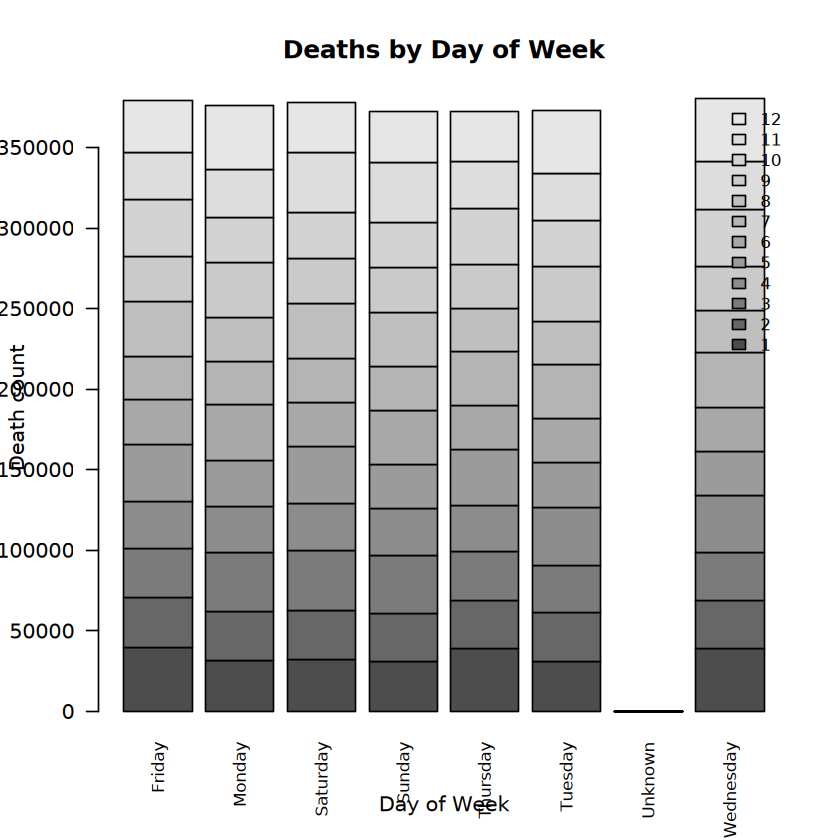

In [9]:
barplot(
    month_day_table,
    beside = FALSE,
    main = "Deaths by Day of Week",
    xlab = "Day of Week",
    ylab = "Death count",
    las = 2,
    cex.names = 0.8,
    legend.text = TRUE,
    args.legend = list(x = "topright", bty = "n", cex = 0.8)
)

I can't print out mapping_table at all, and I'm very confused. Every time I try it it crashes my kernel. I printed out a summary and I'm not sure if it's supposed to be that big.
Looking at my barplot, I'm not too sure why one of the columns is just Unknown. I don't think I messed up any data, so I'm not sure.

5.1: From what it looks like, `merge()` is used when you have 2 different data sets where you want to combine 1 column from each that both have the same kind of data in them?

5.2: See the barplot.

5.3: I don't think I understand this one, wouldn't it just be the same as the barplot in 5.2?

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
